In [1]:
# Task 1.1

import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
data = np.genfromtxt('framingham.csv', delimiter=',', skip_header=1)

# Eliminando filas con valores NaN
data = data[~np.isnan(data).any(axis=1)]


In [2]:
#Task 1.2

# Variable independiente - Nivel de colesterol total
X = data[:, 9]
# Variable dependiente - Riesgo de enfermedad coronaria en 10 anios
y = data[:, 15]


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = -(1/m) * (np.sum(y * np.log(h) + (1-y) * np.log(1-h)))
    return J

def gradient(X, y, theta):
    m = len(y)
    n = X.shape[1]  
    h = sigmoid(np.dot(X, theta))
    return np.array([np.sum((h - y) * X[:, j]) for j in range(n)])/m


# Normalizacion de datos
X = (X - np.mean(X)) / np.std(X)

# Agregar columna de unos
X = np.column_stack((np.ones(X.shape[0]), X))

# Inicializacion de parametros
theta = np.zeros(X.shape[1])



Theta:  [-0.01727441  0.0016272 ]


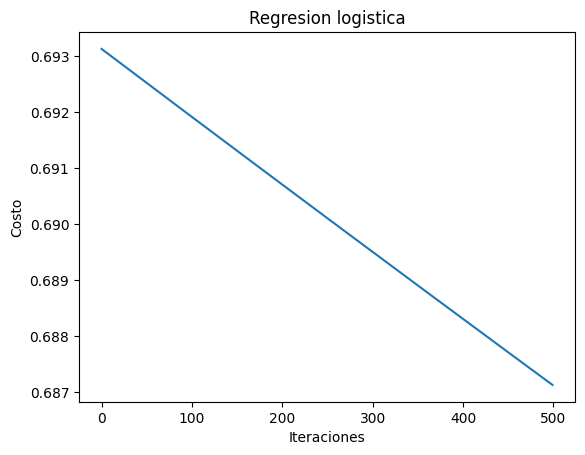

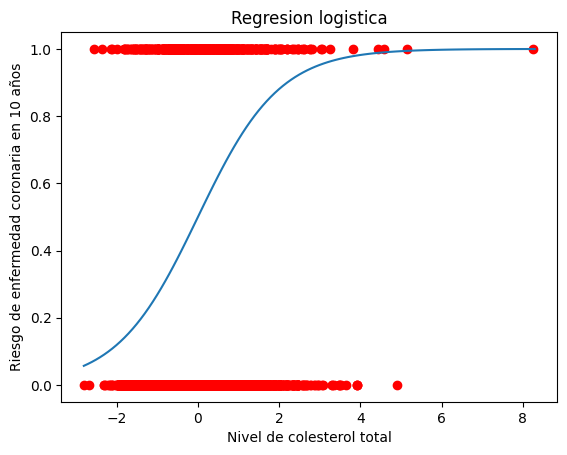

In [3]:
#Task 1.3

def logistic_reg(X, y, t, a, n):
    costs = []
    for i in range(n):
        t -= a * gradient(X, y, t)
        costs.append(cost(X, y, t))
    return t, costs  

# Entrenamiento del modelo
new_theta, costs = logistic_reg(X, y, theta, a=0.0001, n=500)

print('Theta: ', new_theta)


# Grafica de la funcion de costo
plt.plot(costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Regresion logistica')
plt.show()

# Grafica de la funcion de regresion logistica
xx = np.arange(X[:, 1].min(), X[:, 1].max() + 0.1, 0.1)
yy = sigmoid(xx)
plt.scatter(X[:, 1], y, color='red')
plt.plot(xx, yy) 
plt.xlabel('Nivel de colesterol total')
plt.ylabel('Riesgo de enfermedad coronaria en 10 años')
plt.title('Regresion logistica')
plt.show()


In [6]:
#Task 1.4

# Cross validation
def cross_val(X, y, k):
    
    p = np.arange(len(y))
    np.random.seed(123)
    np.random.shuffle(p)
    X = X[p]
    y = y[p]
        
    k_times = len(y) // k
    test_errors, training_errors = [], []
    
    for i in range(k):
        x_train = np.concatenate((X[:i*k_times], X[(i+1)*k_times:]))
        y_train = np.concatenate((y[:i*k_times], y[(i+1)*k_times:]))
        x_test = X[i*k_times:(i+1)*k_times]
        y_test = y[i*k_times:(i+1)*k_times]
        
        
        theta_0 = np.zeros(X.shape[1])
        theta_f = logistic_reg(x_train, y_train, theta_0, a=0.0001, n=1000)[0]
        
        # Calcular error de entrenamiento
        y_pred = sigmoid(np.dot(x_train, theta_f))
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        training_errors.append(np.mean(y_pred != y_train))

        # Calcular error de train
        y_pred = sigmoid(np.dot(x_test, theta_f))
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        test_errors.append(np.mean(y_pred != y_test))

    mean_errors = [(training_errors[i] + test_errors[i]) / 2 for i in range(k)]
    best_degree = mean_errors.index(min(mean_errors))
    mean_error = min(mean_errors)

    return best_degree, 1-mean_error


k = 5
print('Mejor grado polinomial: ', cross_val(X, y, k)[0], " con un accuracy de ", cross_val(X, y, k)[1]*100, "%")


Mejor grado polinomial:  4  con un accuracy de  85.5020052147275 %


### Task 1.5

Se toma en cuenta que para un 5 diferentes pruebas de k (siendo desde 1 a 5) se obtuvo que el grado del polinomio que mejor describe la nube de puntos es 4, con un 85.5 como promedio entre el los resultados del set de prueba y de entrenamiento. De esta forma no se obtiene un underfitting o underfitting. Además, se observa en la gráfica de regresión logistica como mientras más alto es el nivel de colesterol de la persona, mayor es la probabilidad de que le de un paro cardiaco. Por otra parte se observa que mientras menor es el nivel de colesterol de la persona menor es la probabilidad de que le de un paro cardiaco, sin embargo, la probabilidad no es nula, es decir no se descarta el hecho de que pueda suceder.

